# Zajęcie 3 (2024)

# PCA i wizualizacja skupień

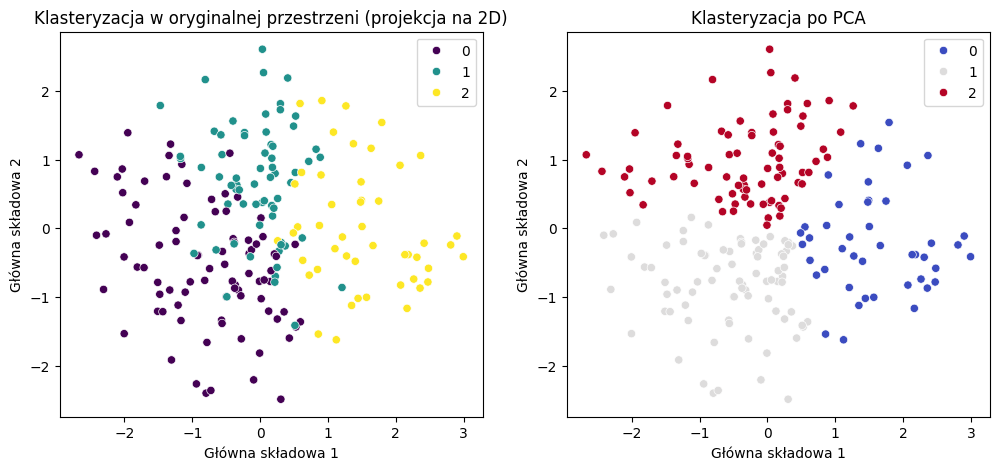

Wariancja wyjaśniona przez PCA: [0.26542666 0.20580487]
Łączna wyjaśniona wariancja: 0.47


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Generowanie przykładowych danych
np.random.seed(42)
data = np.random.rand(200, 5)  # 200 punktów w 5 wymiarach

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Klasteryzacja K-Means w oryginalnej przestrzeni (5D)
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(data_scaled)

# Redukcja wymiarowości do 2D za pomocą PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Klasteryzacja K-Means po PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(data_pca)

# Wizualizacja klasteryzacji przed i po PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Wykres w oryginalnej przestrzeni PCA (projekcja na 2D)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels_original, palette='viridis', ax=axes[0])
axes[0].set_title('Klasteryzacja w oryginalnej przestrzeni (projekcja na 2D)')
axes[0].set_xlabel('Główna składowa 1')
axes[0].set_ylabel('Główna składowa 2')

# Wykres po PCA
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels_pca, palette='coolwarm', ax=axes[1])
axes[1].set_title('Klasteryzacja po PCA')
axes[1].set_xlabel('Główna składowa 1')
axes[1].set_ylabel('Główna składowa 2')

plt.show()

# Wyświetlenie wyjaśnionej wariancji przez PCA
explained_variance = pca.explained_variance_ratio_
print(f'Wariancja wyjaśniona przez PCA: {explained_variance}')
print(f'Łączna wyjaśniona wariancja: {sum(explained_variance):.2f}')


# Klasteryzacja k-means

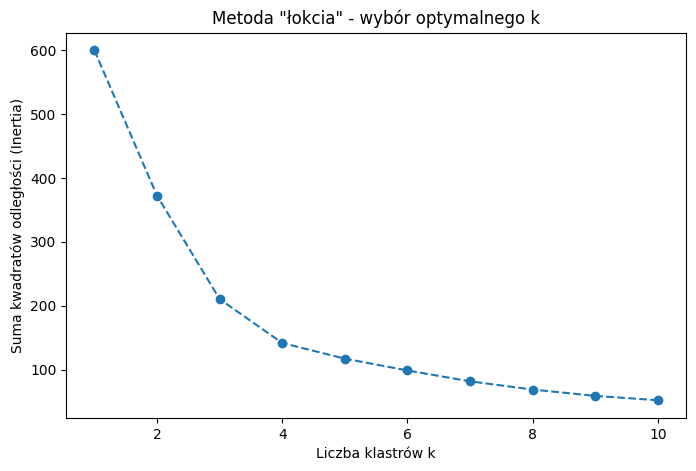

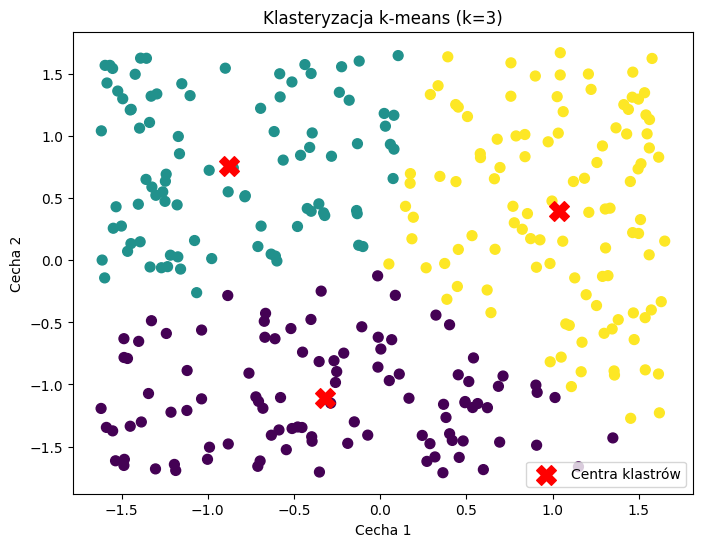

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generowanie przykładowych danych
np.random.seed(42)
data = np.random.rand(300, 2)  # 300 punktów w 2D

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Metoda "łokcia" - analiza sumy kwadratów odległości (inertia_)
distortions = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)  # Wartość funkcji celu (suma kwadratów odległości)

# Wizualizacja metody "łokcia"
plt.figure(figsize=(8, 5))
plt.plot(k_values, distortions, marker='o', linestyle='--')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Suma kwadratów odległości (Inertia)')
plt.title('Metoda "łokcia" - wybór optymalnego k')
plt.show()

# Optymalna liczba klastrów (np. wybrana wizualnie)
optimal_k = 3  # Możesz zmienić na podstawie wykresu

# Klasteryzacja K-Means dla optymalnego k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)

# Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centra klastrów')
plt.title(f'Klasteryzacja k-means (k={optimal_k})')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()


# Klasteryzacja hierarchiczna

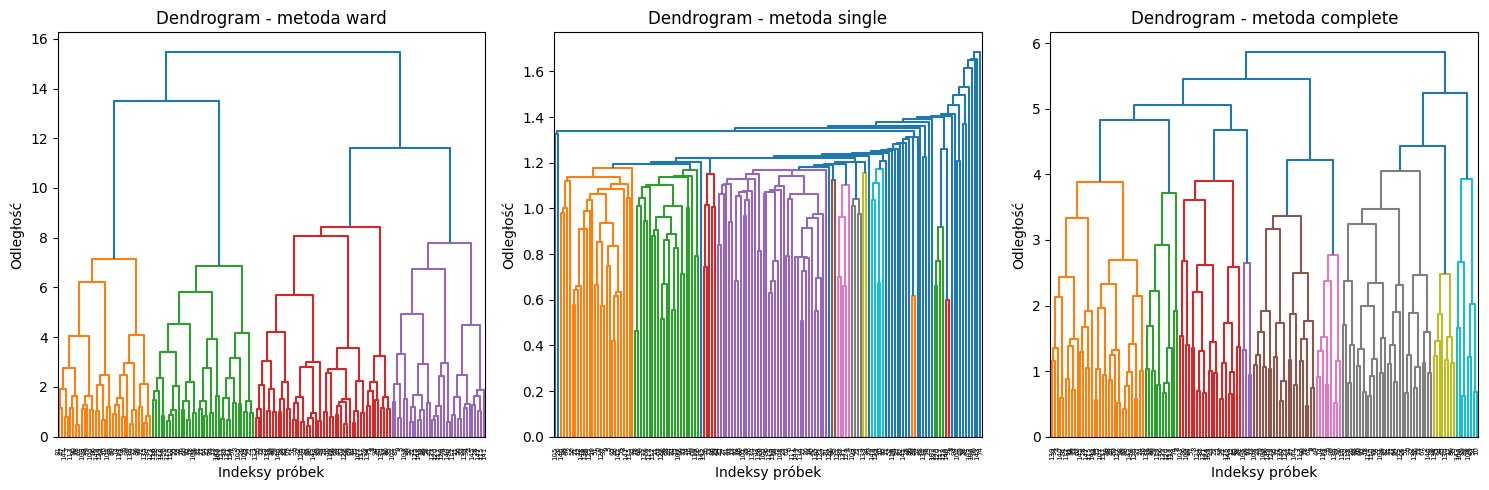

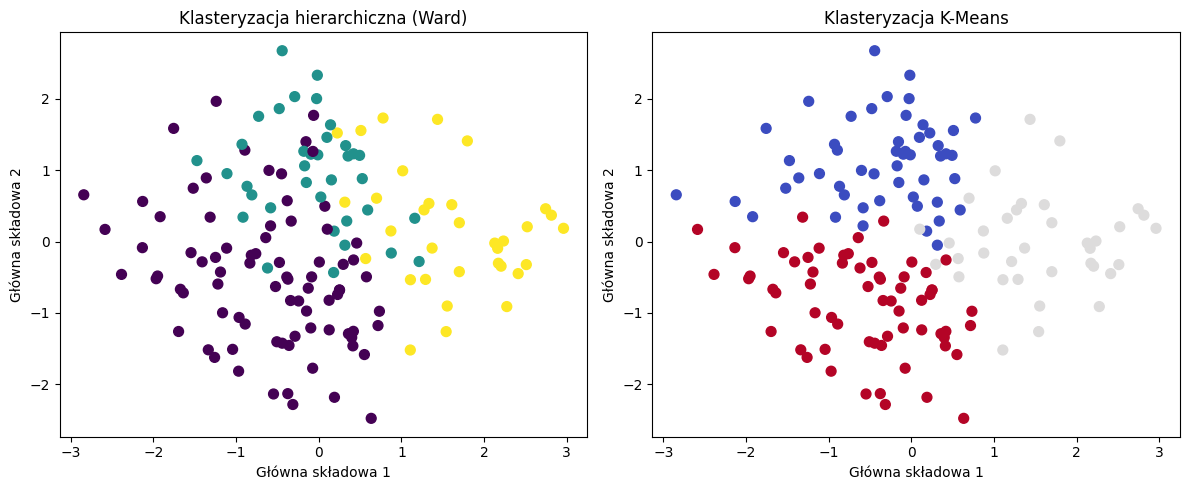

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Generowanie przykładowych danych
np.random.seed(42)
data = np.random.rand(150, 5)  # 150 punktów w 5 wymiarach

# Standaryzacja danych
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Redukcja wymiarowości do 2D za pomocą PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Porównanie metod łączenia w klasteryzacji hierarchicznej
methods = ['ward', 'single', 'complete']

plt.figure(figsize=(15, 5))
for i, method in enumerate(methods, 1):
    linked = linkage(data_scaled, method=method)
    plt.subplot(1, 3, i)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram - metoda {method}')
    plt.xlabel('Indeksy próbek')
    plt.ylabel('Odległość')

plt.tight_layout()
plt.show()

# Wybór metody Ward i wyodrębnienie klastrów
linked_ward = linkage(data_scaled, method='ward')
clusters_ward = fcluster(linked_ward, t=3, criterion='maxclust')

# Klasteryzacja K-Means dla porównania
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(data_scaled)

# Wizualizacja wyników klasteryzacji po PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Klasteryzacja hierarchiczna
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_ward, cmap='viridis', s=50)
axes[0].set_title('Klasteryzacja hierarchiczna (Ward)')

# Klasteryzacja K-Means
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='coolwarm', s=50)
axes[1].set_title('Klasteryzacja K-Means')

for ax in axes:
    ax.set_xlabel('Główna składowa 1')
    ax.set_ylabel('Główna składowa 2')

plt.tight_layout()
plt.show()
